# Table of Contents
- [Imports](#Imports)
- [Set Up](#Set-Up)
- [Data Loaders](#Data-Loaders)
- [Model Training](#Model-Training)
- [Evaluation](#Evaluation)
- [Evaluation Insights](#Evaluation-Insights)
- [Interpretation using LIME](#Interpretation-using-LIME)
- [LIME visualizations for three random samples](#LIME-visualizations-for-three-random-samples)
- [Best/Worst Performing Samples](#Best/Worst-Performing-Samples)
- [Best/Worst Performing Insights](#Best-Performing-Samples)
- [Performance Per Gender](#Performance-Per-Gender)
- [Performance Per Age Group](#Performance-Per-Age-Group)
- [Performance Per Gender/Age Group Insights](#Model-Performance-by-Gender)


# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

from trainer import train_model
from evaluator import evaluate_model, load_model_from_checkpoint
from evaluator import evaluate_samples, get_best_and_worst_samples, load_model_from_checkpoint
from interpret import interpret_sample, ModelWrapper
from base_model import MultiTaskResNet
from utils_data_loader import get_custom_data_loaders_v1
from evaluation import generate_classification_report, perform_threshold_analysis, plot_confusion_matrix

# Set Up

In [2]:
CHECKPOINT_DIR = "checkpoints"
RESULTS_FILE = "metrics.csv"
EVALUATION_FILE = "evaluation_metrics.csv"

BATCH_SIZE = 32
MAX_EPOCHS = 10
LEARNING_RATE = 0.0001
VERSION = 'v1'

# Data Loaders

In [3]:
train_loader, val_loader, test_loader = get_custom_data_loaders_v1(batch_size=BATCH_SIZE)

[DEBUG] Loaded 14164 images from data/train
[DEBUG] Loaded 4722 images from data/validation
[DEBUG] Loaded 4722 images from data/test


# Model Training

In [4]:
print(f"--- Training Model Version: {VERSION} ---")
model = MultiTaskResNet(learning_rate=LEARNING_RATE)

train_model(model, train_loader, val_loader, test_loader, VERSION, max_epochs=MAX_EPOCHS, checkpoint_dir=CHECKPOINT_DIR)
# 35m 30.4s

--- Training Model Version: v1 ---


c:\Users\Liberty\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Liberty\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type            | Params | Mode 
--------------------------------------------------
0 | model | MultiTaskResNet | 11.3 M | train
--------------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Val Gender Accuracy: 0.9688
Val Age MAE: 22.9905
Val Gender Accuracy: 0.9688
Val Age MAE: 13.1336


c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Train Gender Accuracy: 0.4062
Train Age MAE: 25.9853
Train Gender Accuracy: 0.5938
Train Age MAE: 33.7971
Train Gender Accuracy: 0.3438
Train Age MAE: 28.6816
Train Gender Accuracy: 0.4688
Train Age MAE: 34.0482
Train Gender Accuracy: 0.4688
Train Age MAE: 34.9676
Train Gender Accuracy: 0.4062
Train Age MAE: 35.9453
Train Gender Accuracy: 0.5000
Train Age MAE: 24.3931
Train Gender Accuracy: 0.5312
Train Age MAE: 31.9900
Train Gender Accuracy: 0.6250
Train Age MAE: 36.8382
Train Gender Accuracy: 0.5938
Train Age MAE: 34.8279
Train Gender Accuracy: 0.5625
Train Age MAE: 33.0125
Train Gender Accuracy: 0.6250
Train Age MAE: 31.9053
Train Gender Accuracy: 0.4688
Train Age MAE: 29.0708
Train Gender Accuracy: 0.6875
Train Age MAE: 28.9465
Train Gender Accuracy: 0.7188
Train Age MAE: 25.2435
Train Gender Accuracy: 0.5000
Train Age MAE: 35.3269
Train Gender Accuracy: 0.5312
Train Age MAE: 30.9493
Train Gender Accuracy: 0.8438
Train Age MAE: 28.6090
Train Gender Accuracy: 0.7812
Train Age MAE: 3

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.7812
Val Age MAE: 5.5665
Val Gender Accuracy: 1.0000
Val Age MAE: 4.5269
Val Gender Accuracy: 0.8750
Val Age MAE: 5.0258
Val Gender Accuracy: 0.9062
Val Age MAE: 5.4125
Val Gender Accuracy: 0.8750
Val Age MAE: 4.2267
Val Gender Accuracy: 0.8125
Val Age MAE: 2.2926
Val Gender Accuracy: 0.8750
Val Age MAE: 1.8523
Val Gender Accuracy: 0.8750
Val Age MAE: 2.2483
Val Gender Accuracy: 0.8125
Val Age MAE: 3.8330
Val Gender Accuracy: 0.9062
Val Age MAE: 3.0345
Val Gender Accuracy: 0.9062
Val Age MAE: 3.3011
Val Gender Accuracy: 0.8750
Val Age MAE: 2.9909
Val Gender Accuracy: 0.8438
Val Age MAE: 2.3517
Val Gender Accuracy: 0.8438
Val Age MAE: 2.1274
Val Gender Accuracy: 0.8750
Val Age MAE: 3.3268
Val Gender Accuracy: 0.8125
Val Age MAE: 3.3598
Val Gender Accuracy: 0.9688
Val Age MAE: 2.5233
Val Gender Accuracy: 0.8438
Val Age MAE: 3.1289
Val Gender Accuracy: 0.7812
Val Age MAE: 3.7927
Val Gender Accuracy: 0.9688
Val Age MAE: 3.4086
Val Gender Accuracy: 0.7812
Val Age MAE:

Metric val_loss improved. New best score: 68.342
Epoch 0, global step 443: 'val_loss' reached 68.34237 (best 68.34237), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v1_best.ckpt' as top 1


Val Gender Accuracy: 0.4688
Val Age MAE: 4.5250
Val Gender Accuracy: 0.1111
Val Age MAE: 7.7694
Train Gender Accuracy: 0.6562
Train Age MAE: 7.5091
Train Gender Accuracy: 0.8125
Train Age MAE: 7.3143
Train Gender Accuracy: 0.6562
Train Age MAE: 5.0967
Train Gender Accuracy: 0.7188
Train Age MAE: 5.8027
Train Gender Accuracy: 0.6875
Train Age MAE: 6.7561
Train Gender Accuracy: 0.7500
Train Age MAE: 4.2549
Train Gender Accuracy: 0.7188
Train Age MAE: 5.4959
Train Gender Accuracy: 0.8750
Train Age MAE: 7.8211
Train Gender Accuracy: 0.5938
Train Age MAE: 5.0164
Train Gender Accuracy: 0.7500
Train Age MAE: 3.3728
Train Gender Accuracy: 0.6562
Train Age MAE: 8.4971
Train Gender Accuracy: 0.5625
Train Age MAE: 4.8205
Train Gender Accuracy: 0.5625
Train Age MAE: 6.7571
Train Gender Accuracy: 0.6875
Train Age MAE: 4.6150
Train Gender Accuracy: 0.4062
Train Age MAE: 4.0945
Train Gender Accuracy: 0.7188
Train Age MAE: 4.6562
Train Gender Accuracy: 0.6562
Train Age MAE: 4.9776
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9062
Val Age MAE: 6.1351
Val Gender Accuracy: 1.0000
Val Age MAE: 5.3846
Val Gender Accuracy: 0.9375
Val Age MAE: 5.8988
Val Gender Accuracy: 0.9375
Val Age MAE: 6.0660
Val Gender Accuracy: 0.9062
Val Age MAE: 4.9664
Val Gender Accuracy: 0.4688
Val Age MAE: 2.5358
Val Gender Accuracy: 0.3438
Val Age MAE: 2.0579
Val Gender Accuracy: 0.5625
Val Age MAE: 1.7595
Val Gender Accuracy: 0.7188
Val Age MAE: 4.7989
Val Gender Accuracy: 0.9375
Val Age MAE: 4.2960
Val Gender Accuracy: 1.0000
Val Age MAE: 5.7289
Val Gender Accuracy: 0.9375
Val Age MAE: 4.6332
Val Gender Accuracy: 0.9688
Val Age MAE: 4.7560
Val Gender Accuracy: 0.9688
Val Age MAE: 3.7932
Val Gender Accuracy: 0.9688
Val Age MAE: 5.0252
Val Gender Accuracy: 0.9688
Val Age MAE: 4.1607
Val Gender Accuracy: 1.0000
Val Age MAE: 3.4741
Val Gender Accuracy: 0.9688
Val Age MAE: 4.5578
Val Gender Accuracy: 0.9688
Val Age MAE: 4.1270
Val Gender Accuracy: 1.0000
Val Age MAE: 4.0718
Val Gender Accuracy: 0.9688
Val Age MAE:

Metric val_loss improved by 8.723 >= min_delta = 0.0. New best score: 59.619
Epoch 1, global step 886: 'val_loss' reached 59.61926 (best 59.61926), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v1_best.ckpt' as top 1


Val Gender Accuracy: 0.1875
Val Age MAE: 7.1914
Val Gender Accuracy: 0.3333
Val Age MAE: 7.4950
Train Gender Accuracy: 0.6875
Train Age MAE: 4.4277
Train Gender Accuracy: 0.6875
Train Age MAE: 4.8204
Train Gender Accuracy: 0.6875
Train Age MAE: 6.1033
Train Gender Accuracy: 0.7812
Train Age MAE: 4.7151
Train Gender Accuracy: 0.7812
Train Age MAE: 4.8061
Train Gender Accuracy: 0.5938
Train Age MAE: 5.8710
Train Gender Accuracy: 0.8438
Train Age MAE: 3.6248
Train Gender Accuracy: 0.8438
Train Age MAE: 6.9900
Train Gender Accuracy: 0.7188
Train Age MAE: 4.1534
Train Gender Accuracy: 0.6250
Train Age MAE: 3.2753
Train Gender Accuracy: 0.7188
Train Age MAE: 4.9329
Train Gender Accuracy: 0.8125
Train Age MAE: 4.1483
Train Gender Accuracy: 0.7188
Train Age MAE: 3.5982
Train Gender Accuracy: 0.7500
Train Age MAE: 3.7181
Train Gender Accuracy: 0.6875
Train Age MAE: 4.5731
Train Gender Accuracy: 0.9062
Train Age MAE: 5.2395
Train Gender Accuracy: 0.6250
Train Age MAE: 3.0690
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.6875
Val Age MAE: 5.6453
Val Gender Accuracy: 0.7500
Val Age MAE: 4.8550
Val Gender Accuracy: 0.8750
Val Age MAE: 6.6498
Val Gender Accuracy: 0.7500
Val Age MAE: 6.2069
Val Gender Accuracy: 0.9375
Val Age MAE: 5.0752
Val Gender Accuracy: 0.4375
Val Age MAE: 2.4121
Val Gender Accuracy: 0.3438
Val Age MAE: 1.6635
Val Gender Accuracy: 0.4375
Val Age MAE: 1.6747
Val Gender Accuracy: 0.7188
Val Age MAE: 5.1350
Val Gender Accuracy: 0.9062
Val Age MAE: 5.7520
Val Gender Accuracy: 0.9375
Val Age MAE: 5.3801
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6175
Val Gender Accuracy: 0.9062
Val Age MAE: 4.8361
Val Gender Accuracy: 1.0000
Val Age MAE: 3.8523
Val Gender Accuracy: 0.9688
Val Age MAE: 3.6094
Val Gender Accuracy: 0.9062
Val Age MAE: 2.9606
Val Gender Accuracy: 0.9688
Val Age MAE: 3.5657
Val Gender Accuracy: 0.9375
Val Age MAE: 3.5287
Val Gender Accuracy: 0.8750
Val Age MAE: 3.0795
Val Gender Accuracy: 0.9688
Val Age MAE: 3.2925
Val Gender Accuracy: 0.9375
Val Age MAE:

Metric val_loss improved by 2.722 >= min_delta = 0.0. New best score: 56.897
Epoch 2, global step 1329: 'val_loss' reached 56.89704 (best 56.89704), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v1_best.ckpt' as top 1


Val Gender Accuracy: 0.5000
Val Age MAE: 6.3633
Val Gender Accuracy: 0.6667
Val Age MAE: 7.5847
Train Gender Accuracy: 0.8125
Train Age MAE: 3.4234
Train Gender Accuracy: 0.9062
Train Age MAE: 3.3897
Train Gender Accuracy: 0.8750
Train Age MAE: 4.3572
Train Gender Accuracy: 0.7500
Train Age MAE: 4.2624
Train Gender Accuracy: 0.9062
Train Age MAE: 3.0438
Train Gender Accuracy: 0.8125
Train Age MAE: 3.8827
Train Gender Accuracy: 0.8125
Train Age MAE: 2.8754
Train Gender Accuracy: 0.8750
Train Age MAE: 4.5360
Train Gender Accuracy: 0.7500
Train Age MAE: 4.4466
Train Gender Accuracy: 0.8438
Train Age MAE: 7.0855
Train Gender Accuracy: 0.8438
Train Age MAE: 4.6836
Train Gender Accuracy: 0.7500
Train Age MAE: 4.2577
Train Gender Accuracy: 0.7500
Train Age MAE: 2.5648
Train Gender Accuracy: 0.7812
Train Age MAE: 2.8022
Train Gender Accuracy: 0.6250
Train Age MAE: 5.1201
Train Gender Accuracy: 0.8438
Train Age MAE: 3.8694
Train Gender Accuracy: 0.8750
Train Age MAE: 4.0785
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8438
Val Age MAE: 5.6961
Val Gender Accuracy: 0.9375
Val Age MAE: 4.2115
Val Gender Accuracy: 0.9375
Val Age MAE: 5.9325
Val Gender Accuracy: 0.8750
Val Age MAE: 5.2440
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7189
Val Gender Accuracy: 0.8125
Val Age MAE: 1.7650
Val Gender Accuracy: 0.7500
Val Age MAE: 0.7516
Val Gender Accuracy: 0.8125
Val Age MAE: 0.7291
Val Gender Accuracy: 0.8750
Val Age MAE: 4.8034
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7370
Val Gender Accuracy: 0.9688
Val Age MAE: 4.8617
Val Gender Accuracy: 0.9062
Val Age MAE: 4.1186
Val Gender Accuracy: 0.9688
Val Age MAE: 4.3837
Val Gender Accuracy: 1.0000
Val Age MAE: 3.7259
Val Gender Accuracy: 0.9688
Val Age MAE: 3.7767
Val Gender Accuracy: 0.9688
Val Age MAE: 3.1874
Val Gender Accuracy: 1.0000
Val Age MAE: 2.4094
Val Gender Accuracy: 1.0000
Val Age MAE: 3.5968
Val Gender Accuracy: 0.9062
Val Age MAE: 3.8373
Val Gender Accuracy: 0.9688
Val Age MAE: 3.1027
Val Gender Accuracy: 0.9375
Val Age MAE:

Metric val_loss improved by 2.529 >= min_delta = 0.0. New best score: 54.368
Epoch 3, global step 1772: 'val_loss' reached 54.36771 (best 54.36771), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v1_best.ckpt' as top 1


Val Gender Accuracy: 0.5938
Val Age MAE: 7.8123
Val Gender Accuracy: 0.3333
Val Age MAE: 6.1147
Train Gender Accuracy: 0.7812
Train Age MAE: 4.3441
Train Gender Accuracy: 0.7812
Train Age MAE: 3.6774
Train Gender Accuracy: 0.8750
Train Age MAE: 4.2227
Train Gender Accuracy: 0.8438
Train Age MAE: 4.2571
Train Gender Accuracy: 0.9688
Train Age MAE: 4.6257
Train Gender Accuracy: 0.9375
Train Age MAE: 3.5395
Train Gender Accuracy: 0.9375
Train Age MAE: 4.2646
Train Gender Accuracy: 0.9375
Train Age MAE: 4.5572
Train Gender Accuracy: 0.9375
Train Age MAE: 3.0839
Train Gender Accuracy: 0.8438
Train Age MAE: 2.7282
Train Gender Accuracy: 0.9062
Train Age MAE: 3.1569
Train Gender Accuracy: 0.9375
Train Age MAE: 2.8720
Train Gender Accuracy: 0.7500
Train Age MAE: 4.0077
Train Gender Accuracy: 0.9062
Train Age MAE: 3.4806
Train Gender Accuracy: 0.8750
Train Age MAE: 3.1770
Train Gender Accuracy: 0.9375
Train Age MAE: 3.9483
Train Gender Accuracy: 0.7188
Train Age MAE: 3.0782
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8750
Val Age MAE: 4.5660
Val Gender Accuracy: 0.9375
Val Age MAE: 3.7422
Val Gender Accuracy: 0.9062
Val Age MAE: 4.7984
Val Gender Accuracy: 0.8125
Val Age MAE: 4.1935
Val Gender Accuracy: 0.9375
Val Age MAE: 4.2431
Val Gender Accuracy: 0.8438
Val Age MAE: 1.7807
Val Gender Accuracy: 0.8438
Val Age MAE: 1.2289
Val Gender Accuracy: 0.9062
Val Age MAE: 1.3183
Val Gender Accuracy: 0.9062
Val Age MAE: 2.8337
Val Gender Accuracy: 0.9062
Val Age MAE: 3.5224
Val Gender Accuracy: 0.9688
Val Age MAE: 3.8120
Val Gender Accuracy: 0.9062
Val Age MAE: 2.8669
Val Gender Accuracy: 0.9688
Val Age MAE: 2.3984
Val Gender Accuracy: 0.9688
Val Age MAE: 2.9324
Val Gender Accuracy: 0.9688
Val Age MAE: 2.7006
Val Gender Accuracy: 0.9375
Val Age MAE: 2.6380
Val Gender Accuracy: 1.0000
Val Age MAE: 2.2084
Val Gender Accuracy: 1.0000
Val Age MAE: 3.1162
Val Gender Accuracy: 0.8438
Val Age MAE: 3.0206
Val Gender Accuracy: 0.9375
Val Age MAE: 3.8666
Val Gender Accuracy: 1.0000
Val Age MAE:

Epoch 4, global step 2215: 'val_loss' was not in top 1


Val Gender Accuracy: 0.5000
Val Age MAE: 4.7023
Val Gender Accuracy: 0.7222
Val Age MAE: 3.9149
Train Gender Accuracy: 0.8750
Train Age MAE: 3.0892
Train Gender Accuracy: 0.9062
Train Age MAE: 3.3862
Train Gender Accuracy: 0.9062
Train Age MAE: 3.1301
Train Gender Accuracy: 0.9375
Train Age MAE: 2.5523
Train Gender Accuracy: 0.7500
Train Age MAE: 3.1064
Train Gender Accuracy: 0.8750
Train Age MAE: 3.0042
Train Gender Accuracy: 0.8438
Train Age MAE: 2.7865
Train Gender Accuracy: 0.9062
Train Age MAE: 3.4446
Train Gender Accuracy: 0.9375
Train Age MAE: 3.3000
Train Gender Accuracy: 0.9688
Train Age MAE: 3.8981
Train Gender Accuracy: 0.8438
Train Age MAE: 1.8744
Train Gender Accuracy: 0.8438
Train Age MAE: 2.4149
Train Gender Accuracy: 0.9062
Train Age MAE: 2.6175
Train Gender Accuracy: 0.9062
Train Age MAE: 3.0216
Train Gender Accuracy: 0.7812
Train Age MAE: 1.4009
Train Gender Accuracy: 0.9062
Train Age MAE: 2.7238
Train Gender Accuracy: 0.9688
Train Age MAE: 2.8364
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.7500
Val Age MAE: 4.8518
Val Gender Accuracy: 0.8750
Val Age MAE: 4.7108
Val Gender Accuracy: 0.9062
Val Age MAE: 6.1980
Val Gender Accuracy: 0.7500
Val Age MAE: 5.9655
Val Gender Accuracy: 0.9062
Val Age MAE: 5.2511
Val Gender Accuracy: 0.5938
Val Age MAE: 1.8885
Val Gender Accuracy: 0.5625
Val Age MAE: 0.6885
Val Gender Accuracy: 0.5000
Val Age MAE: 0.7095
Val Gender Accuracy: 0.8125
Val Age MAE: 5.4301
Val Gender Accuracy: 0.9062
Val Age MAE: 5.8924
Val Gender Accuracy: 0.9688
Val Age MAE: 5.8565
Val Gender Accuracy: 0.8750
Val Age MAE: 5.2065
Val Gender Accuracy: 0.9375
Val Age MAE: 5.6670
Val Gender Accuracy: 1.0000
Val Age MAE: 5.1832
Val Gender Accuracy: 1.0000
Val Age MAE: 4.4717
Val Gender Accuracy: 0.9062
Val Age MAE: 4.5045
Val Gender Accuracy: 1.0000
Val Age MAE: 2.8894
Val Gender Accuracy: 1.0000
Val Age MAE: 4.4929
Val Gender Accuracy: 0.9062
Val Age MAE: 4.7836
Val Gender Accuracy: 0.9688
Val Age MAE: 4.2669
Val Gender Accuracy: 0.9688
Val Age MAE:

Epoch 5, global step 2658: 'val_loss' was not in top 1


Val Gender Accuracy: 0.7500
Val Age MAE: 4.8725
Val Gender Accuracy: 0.7222
Val Age MAE: 6.1151
Train Gender Accuracy: 0.9375
Train Age MAE: 2.8300
Train Gender Accuracy: 0.9688
Train Age MAE: 2.8046
Train Gender Accuracy: 0.8125
Train Age MAE: 2.3170
Train Gender Accuracy: 0.7812
Train Age MAE: 3.5555
Train Gender Accuracy: 0.9375
Train Age MAE: 3.6520
Train Gender Accuracy: 0.8125
Train Age MAE: 2.6070
Train Gender Accuracy: 0.7812
Train Age MAE: 3.4566
Train Gender Accuracy: 0.7812
Train Age MAE: 2.2444
Train Gender Accuracy: 0.9375
Train Age MAE: 2.6253
Train Gender Accuracy: 0.9062
Train Age MAE: 2.4284
Train Gender Accuracy: 0.9062
Train Age MAE: 2.6418
Train Gender Accuracy: 0.8125
Train Age MAE: 3.0175
Train Gender Accuracy: 0.8750
Train Age MAE: 2.5836
Train Gender Accuracy: 0.9062
Train Age MAE: 2.7198
Train Gender Accuracy: 0.8438
Train Age MAE: 2.6844
Train Gender Accuracy: 0.9375
Train Age MAE: 2.7593
Train Gender Accuracy: 0.8438
Train Age MAE: 3.5440
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9062
Val Age MAE: 5.4632
Val Gender Accuracy: 0.9688
Val Age MAE: 3.8815
Val Gender Accuracy: 0.9375
Val Age MAE: 6.2995
Val Gender Accuracy: 0.9062
Val Age MAE: 5.3214
Val Gender Accuracy: 0.9688
Val Age MAE: 5.9511
Val Gender Accuracy: 0.6562
Val Age MAE: 1.9300
Val Gender Accuracy: 0.6562
Val Age MAE: 1.2505
Val Gender Accuracy: 0.6875
Val Age MAE: 1.2317
Val Gender Accuracy: 0.7188
Val Age MAE: 5.4120
Val Gender Accuracy: 0.9375
Val Age MAE: 5.2889
Val Gender Accuracy: 0.9688
Val Age MAE: 5.2577
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7790
Val Gender Accuracy: 0.9375
Val Age MAE: 5.1942
Val Gender Accuracy: 1.0000
Val Age MAE: 4.5621
Val Gender Accuracy: 1.0000
Val Age MAE: 4.0912
Val Gender Accuracy: 0.9688
Val Age MAE: 3.8641
Val Gender Accuracy: 1.0000
Val Age MAE: 3.1761
Val Gender Accuracy: 1.0000
Val Age MAE: 3.7252
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6091
Val Gender Accuracy: 0.9688
Val Age MAE: 3.9090
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 0.095 >= min_delta = 0.0. New best score: 54.272
Epoch 6, global step 3101: 'val_loss' reached 54.27243 (best 54.27243), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v1_best.ckpt' as top 1


Val Gender Accuracy: 0.5000
Val Age MAE: 5.4043
Val Gender Accuracy: 0.6111
Val Age MAE: 6.6327
Train Gender Accuracy: 0.8750
Train Age MAE: 2.6485
Train Gender Accuracy: 0.9062
Train Age MAE: 2.0510
Train Gender Accuracy: 0.9375
Train Age MAE: 2.6372
Train Gender Accuracy: 0.8750
Train Age MAE: 2.0108
Train Gender Accuracy: 0.8750
Train Age MAE: 3.0199
Train Gender Accuracy: 0.8438
Train Age MAE: 3.0997
Train Gender Accuracy: 0.7812
Train Age MAE: 2.7443
Train Gender Accuracy: 0.9375
Train Age MAE: 2.2285
Train Gender Accuracy: 0.8125
Train Age MAE: 2.1370
Train Gender Accuracy: 0.9375
Train Age MAE: 3.1861
Train Gender Accuracy: 0.9688
Train Age MAE: 3.2999
Train Gender Accuracy: 0.9062
Train Age MAE: 2.5888
Train Gender Accuracy: 0.9375
Train Age MAE: 2.4001
Train Gender Accuracy: 0.8125
Train Age MAE: 1.8579
Train Gender Accuracy: 0.9062
Train Age MAE: 2.0733
Train Gender Accuracy: 0.9688
Train Age MAE: 2.0446
Train Gender Accuracy: 0.8125
Train Age MAE: 1.9460
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8750
Val Age MAE: 4.9727
Val Gender Accuracy: 0.9062
Val Age MAE: 4.1889
Val Gender Accuracy: 0.9062
Val Age MAE: 5.6785
Val Gender Accuracy: 0.8125
Val Age MAE: 4.9720
Val Gender Accuracy: 1.0000
Val Age MAE: 5.3818
Val Gender Accuracy: 0.5312
Val Age MAE: 2.0411
Val Gender Accuracy: 0.6250
Val Age MAE: 1.1151
Val Gender Accuracy: 0.4688
Val Age MAE: 0.7980
Val Gender Accuracy: 0.8438
Val Age MAE: 4.3298
Val Gender Accuracy: 0.9375
Val Age MAE: 4.2087
Val Gender Accuracy: 0.9688
Val Age MAE: 5.0238
Val Gender Accuracy: 0.9688
Val Age MAE: 3.8959
Val Gender Accuracy: 0.9688
Val Age MAE: 3.5160
Val Gender Accuracy: 1.0000
Val Age MAE: 3.5013
Val Gender Accuracy: 0.9688
Val Age MAE: 3.5712
Val Gender Accuracy: 1.0000
Val Age MAE: 4.2003
Val Gender Accuracy: 1.0000
Val Age MAE: 2.5660
Val Gender Accuracy: 1.0000
Val Age MAE: 3.6144
Val Gender Accuracy: 0.9062
Val Age MAE: 4.2447
Val Gender Accuracy: 1.0000
Val Age MAE: 2.9143
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 1.916 >= min_delta = 0.0. New best score: 52.357
Epoch 7, global step 3544: 'val_loss' reached 52.35690 (best 52.35690), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v1_best.ckpt' as top 1


Val Gender Accuracy: 0.5312
Val Age MAE: 5.1456
Val Gender Accuracy: 0.7222
Val Age MAE: 5.9374
Train Gender Accuracy: 0.8438
Train Age MAE: 1.9813
Train Gender Accuracy: 0.8750
Train Age MAE: 1.9331
Train Gender Accuracy: 0.9375
Train Age MAE: 2.1932
Train Gender Accuracy: 0.9688
Train Age MAE: 2.5613
Train Gender Accuracy: 0.9062
Train Age MAE: 1.6127
Train Gender Accuracy: 0.9062
Train Age MAE: 2.1855
Train Gender Accuracy: 1.0000
Train Age MAE: 1.7823
Train Gender Accuracy: 0.7812
Train Age MAE: 1.9512
Train Gender Accuracy: 0.9375
Train Age MAE: 2.4373
Train Gender Accuracy: 0.8438
Train Age MAE: 2.7997
Train Gender Accuracy: 0.9375
Train Age MAE: 2.2644
Train Gender Accuracy: 0.9375
Train Age MAE: 1.8220
Train Gender Accuracy: 0.7812
Train Age MAE: 2.1781
Train Gender Accuracy: 0.9062
Train Age MAE: 1.6510
Train Gender Accuracy: 0.7812
Train Age MAE: 1.8406
Train Gender Accuracy: 0.8750
Train Age MAE: 1.6126
Train Gender Accuracy: 0.8438
Train Age MAE: 2.1121
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8750
Val Age MAE: 4.4428
Val Gender Accuracy: 0.9375
Val Age MAE: 3.8952
Val Gender Accuracy: 0.8438
Val Age MAE: 5.1259
Val Gender Accuracy: 0.8750
Val Age MAE: 4.8605
Val Gender Accuracy: 0.9688
Val Age MAE: 4.0701
Val Gender Accuracy: 0.6875
Val Age MAE: 1.2336
Val Gender Accuracy: 0.6875
Val Age MAE: 0.6775
Val Gender Accuracy: 0.6562
Val Age MAE: 0.6771
Val Gender Accuracy: 0.8125
Val Age MAE: 4.0192
Val Gender Accuracy: 0.9375
Val Age MAE: 3.7196
Val Gender Accuracy: 0.9688
Val Age MAE: 3.5584
Val Gender Accuracy: 0.9688
Val Age MAE: 2.9866
Val Gender Accuracy: 0.9375
Val Age MAE: 3.2004
Val Gender Accuracy: 1.0000
Val Age MAE: 3.0103
Val Gender Accuracy: 1.0000
Val Age MAE: 2.6473
Val Gender Accuracy: 0.9062
Val Age MAE: 3.0108
Val Gender Accuracy: 1.0000
Val Age MAE: 2.0092
Val Gender Accuracy: 1.0000
Val Age MAE: 2.7563
Val Gender Accuracy: 0.9375
Val Age MAE: 3.8018
Val Gender Accuracy: 0.9375
Val Age MAE: 3.1443
Val Gender Accuracy: 0.9688
Val Age MAE:

Epoch 8, global step 3987: 'val_loss' was not in top 1


Val Gender Accuracy: 0.7188
Val Age MAE: 6.3335
Val Gender Accuracy: 0.7222
Val Age MAE: 6.4659
Train Gender Accuracy: 0.9062
Train Age MAE: 2.5452
Train Gender Accuracy: 0.8750
Train Age MAE: 1.8035
Train Gender Accuracy: 1.0000
Train Age MAE: 1.6735
Train Gender Accuracy: 0.8750
Train Age MAE: 1.5973
Train Gender Accuracy: 0.9062
Train Age MAE: 2.1140
Train Gender Accuracy: 0.9062
Train Age MAE: 3.4562
Train Gender Accuracy: 0.9688
Train Age MAE: 1.6309
Train Gender Accuracy: 0.9375
Train Age MAE: 1.6695
Train Gender Accuracy: 0.9062
Train Age MAE: 1.6625
Train Gender Accuracy: 0.9062
Train Age MAE: 2.2505
Train Gender Accuracy: 0.9062
Train Age MAE: 1.8105
Train Gender Accuracy: 0.9688
Train Age MAE: 1.5885
Train Gender Accuracy: 0.9375
Train Age MAE: 2.0666
Train Gender Accuracy: 0.9062
Train Age MAE: 1.9591
Train Gender Accuracy: 0.9375
Train Age MAE: 1.7572
Train Gender Accuracy: 0.9062
Train Age MAE: 2.0607
Train Gender Accuracy: 0.8438
Train Age MAE: 1.4361
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.7188
Val Age MAE: 4.5966
Val Gender Accuracy: 0.9062
Val Age MAE: 3.4791
Val Gender Accuracy: 0.7812
Val Age MAE: 5.2559
Val Gender Accuracy: 0.7812
Val Age MAE: 5.0633
Val Gender Accuracy: 0.9375
Val Age MAE: 4.8744
Val Gender Accuracy: 0.3438
Val Age MAE: 1.4601
Val Gender Accuracy: 0.3750
Val Age MAE: 0.8437
Val Gender Accuracy: 0.3750
Val Age MAE: 0.8060
Val Gender Accuracy: 0.6562
Val Age MAE: 4.3251
Val Gender Accuracy: 0.9062
Val Age MAE: 3.9674
Val Gender Accuracy: 0.9688
Val Age MAE: 3.9522
Val Gender Accuracy: 0.8438
Val Age MAE: 3.5010
Val Gender Accuracy: 0.9062
Val Age MAE: 3.3452
Val Gender Accuracy: 1.0000
Val Age MAE: 3.0799
Val Gender Accuracy: 1.0000
Val Age MAE: 3.0182
Val Gender Accuracy: 0.9375
Val Age MAE: 3.2432
Val Gender Accuracy: 0.9688
Val Age MAE: 2.1957
Val Gender Accuracy: 0.9688
Val Age MAE: 2.9299
Val Gender Accuracy: 0.8750
Val Age MAE: 3.7347
Val Gender Accuracy: 0.8438
Val Age MAE: 2.9121
Val Gender Accuracy: 0.9688
Val Age MAE:

Epoch 9, global step 4430: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=10` reached.


Val Gender Accuracy: 0.7188
Val Age MAE: 6.5414
Val Gender Accuracy: 0.8333
Val Age MAE: 6.4322
Training complete for version v1. Checkpoint saved to checkpoints


# Evaluation

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
checkpoint_path = "checkpoints/v1_best.ckpt"
model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=5e-5)
model = model.to(device)

generate_classification_report(model, val_loader, dataset_name="Validation")
generate_classification_report(model, test_loader, dataset_name="Test")

Classification Report for Validation Set:
              precision    recall  f1-score   support

        Male       0.90      0.88      0.89      2465
      Female       0.88      0.89      0.88      2257

    accuracy                           0.89      4722
   macro avg       0.89      0.89      0.89      4722
weighted avg       0.89      0.89      0.89      4722

Classification Report for Test Set:
              precision    recall  f1-score   support

        Male       0.91      0.87      0.89      2467
      Female       0.87      0.90      0.88      2255

    accuracy                           0.89      4722
   macro avg       0.89      0.89      0.89      4722
weighted avg       0.89      0.89      0.89      4722



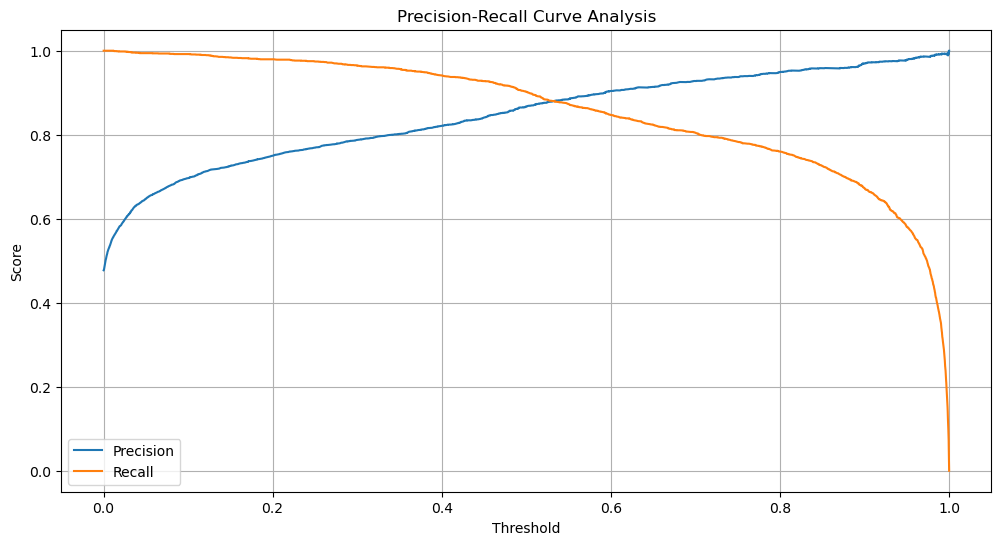

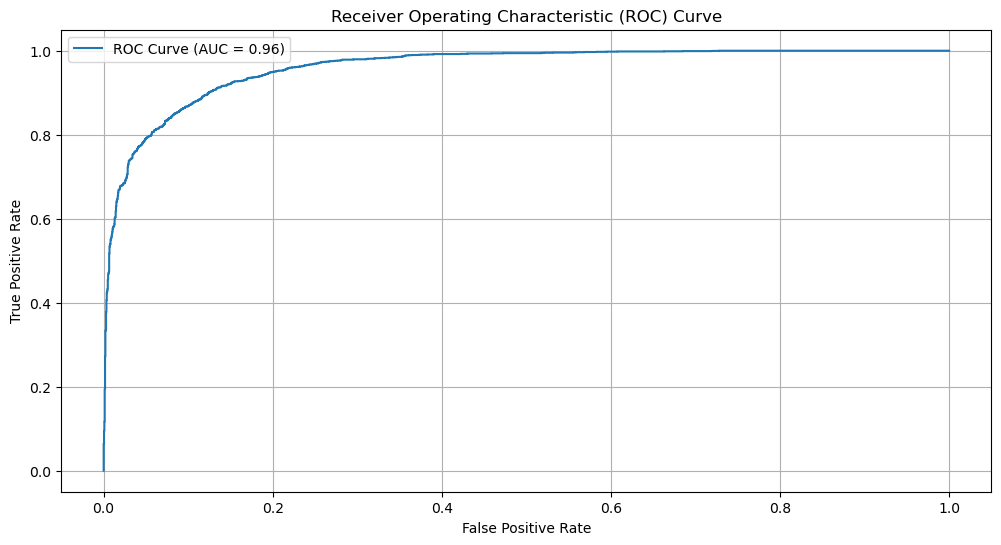

Best Threshold (based on F1 score): 0.48677006363868713


In [9]:
perform_threshold_analysis(model, test_loader)

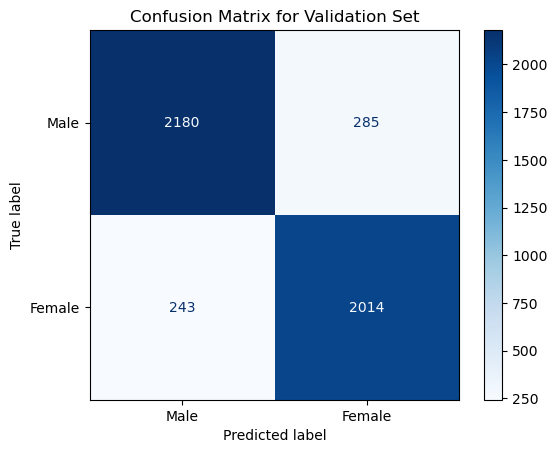

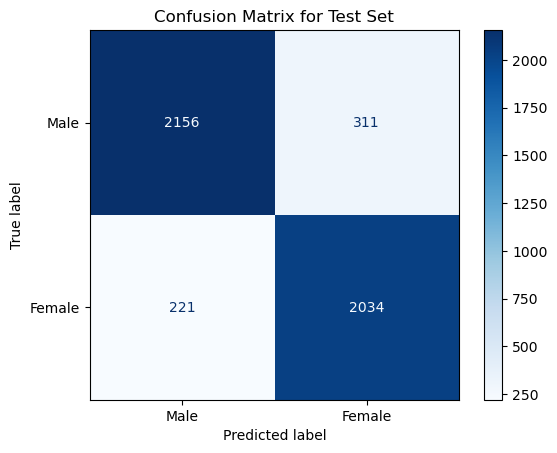

In [10]:
plot_confusion_matrix(model, val_loader, dataset_name="Validation")
plot_confusion_matrix(model, test_loader, dataset_name="Test")

--- Evaluating Model Version: v1 ---
Test Gender Accuracy: 0.8873
Test Age MAE: 5.1825


Version Test_Gender_Accuracy Test_Age_MAE
1      v1   0.8873358746293943    5.1825223

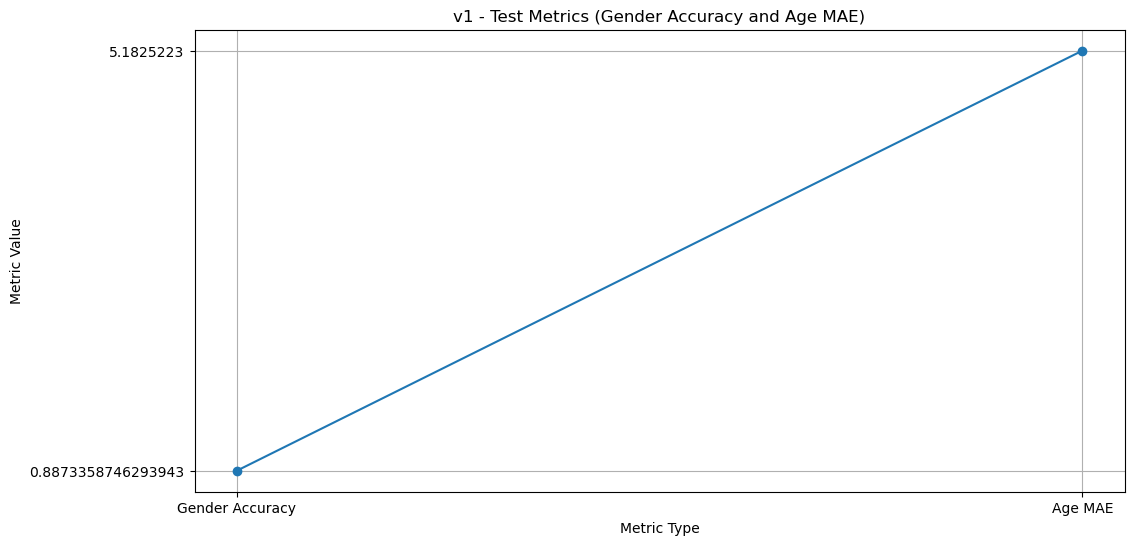

In [12]:
checkpoint_path = "checkpoints/v1_best.ckpt"
if os.path.exists(checkpoint_path):
    print(f"--- Evaluating Model Version: {VERSION} ---")
    model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=LEARNING_RATE)
    metrics = evaluate_model(model, test_loader)

    if os.path.exists(EVALUATION_FILE):
        evaluation_df = pd.read_csv(EVALUATION_FILE, header=None)
        evaluation_df.columns = ['Version', 'Test_Gender_Accuracy', 'Test_Age_MAE']
        version_eval_metrics = evaluation_df[evaluation_df['Version'] == VERSION]
        display(version_eval_metrics)

        plt.figure(figsize=(12, 6))
        plt.plot(['Gender Accuracy', 'Age MAE'], [version_eval_metrics['Test_Gender_Accuracy'].values[0], version_eval_metrics['Test_Age_MAE'].values[0]], marker='o')
        plt.xlabel('Metric Type')
        plt.ylabel('Metric Value')
        plt.title(f'{VERSION} - Test Metrics (Gender Accuracy and Age MAE)')
        plt.grid(True)
        plt.show()

### Evaluation Insights

The overall accuracy for gender classification is **89%** for both validation and test sets, suggesting consistent model performance.
  - **Male Precision and Recall**: 
    - Precision: 0.90 (validation) and 0.91 (test).
    - Recall: 0.88 (validation) and 0.87 (test).
  - **Female Precision and Recall**:
    - Precision: 0.88 (both validation and test).
    - Recall: 0.89 (validation) and 0.87 (test).
  - This indicates that the model performs slightly better in classifying males compared to females, especially in terms of recall.

The confusion matrices show that there are slightly more **false negatives** for males than females in both validation and test sets. It also indicates that **classification errors** are consistent between validation and test, pointing towards model stability.

The precision and recall curves indicate a **trade-off** as the threshold changes. At lower thresholds, recall is high but precision is lower, which means the model captures more true positives but also more false positives. The best threshold (0.4877) is based on maximizing the **F1-score**, suggesting that balancing precision and recall is key for this model. The area under the ROC curve (AUC = **0.96**) is high, indicating a good balance between sensitivity and specificity. The model shows **strong discrimination** ability, which is promising for gender classification.

The **Test Gender Accuracy** is **0.8873**, while the **Age MAE** is **5.1825**. **Age MAE** suggests that the average error in age prediction is around 5 years. Given the wide age range in the dataset, this is a **moderate level of accuracy** but could be improved. The **linear trend** in the plot of accuracy and MAE indicates the balance between these two metrics. Lower gender accuracy corresponds to higher MAE values.

The EDA highlighted a significant number of blurry images, especially in certain racial categories. The moderate accuracy for both genders might be impacted by these blurred images, as the model struggles to extract features effectively. The **slightly lower recall for females** might also be due to differences in image quality or representation imbalance. Some racial groups (e.g., "Others") have higher saturation variation, which could affect model feature extraction consistency. This might explain the model's **consistent errors** across gender and race groups.

The model seems to **struggle** more with older individuals due to the dataset's skewed age distribution. With fewer samples for people above 60 years, the model may not generalize well for these age groups. The relatively high **MAE** might also reflect difficulty in distinguishing age differences, especially in the lower and upper extremes.

The **race imbalance** in the dataset implies that certain racial categories have fewer representations, potentially leading to biased predictions. The **slightly imbalanced gender distribution** could also cause bias, albeit less significant than racial imbalance.

Model v1 performs reasonably well with **consistent gender accuracy** and **moderate age prediction accuracy**. However, improvements in dataset balance, image quality, and specific threshold optimizations could lead to better performance.

# Interpretation using LIME

--- Interpreting Model Version: v1 ---
Interpreting model version v1 for gender prediction (sample 1).


  0%|          | 0/1000 [00:00<?, ?it/s]

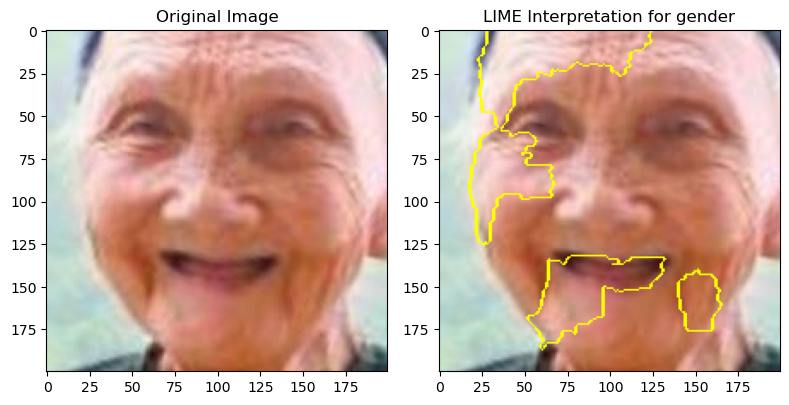

Interpreting model version v1 for age prediction (sample 1).


  0%|          | 0/1000 [00:00<?, ?it/s]

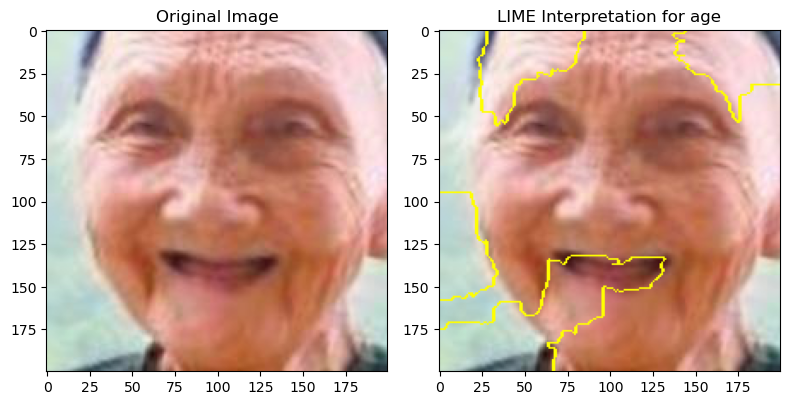

Interpreting model version v1 for gender prediction (sample 2).


  0%|          | 0/1000 [00:00<?, ?it/s]

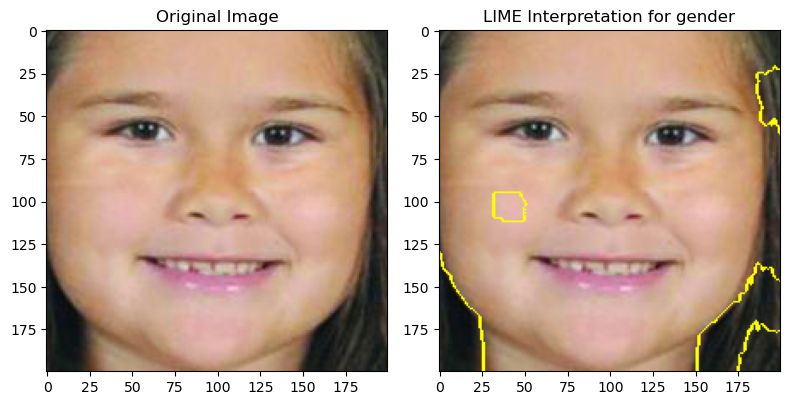

Interpreting model version v1 for age prediction (sample 2).


  0%|          | 0/1000 [00:00<?, ?it/s]

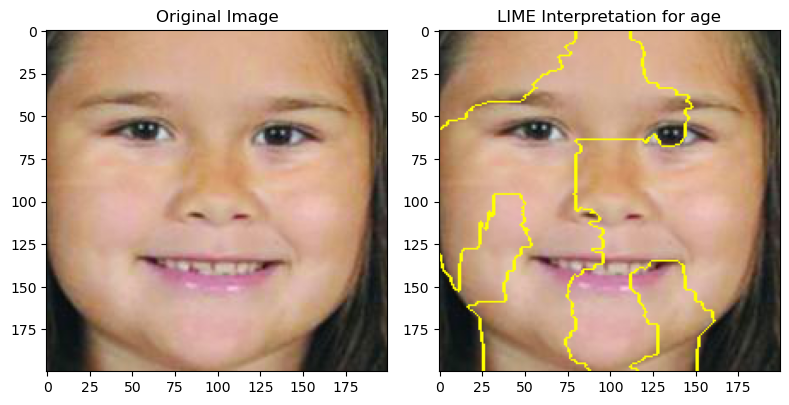

Interpreting model version v1 for gender prediction (sample 3).


  0%|          | 0/1000 [00:00<?, ?it/s]

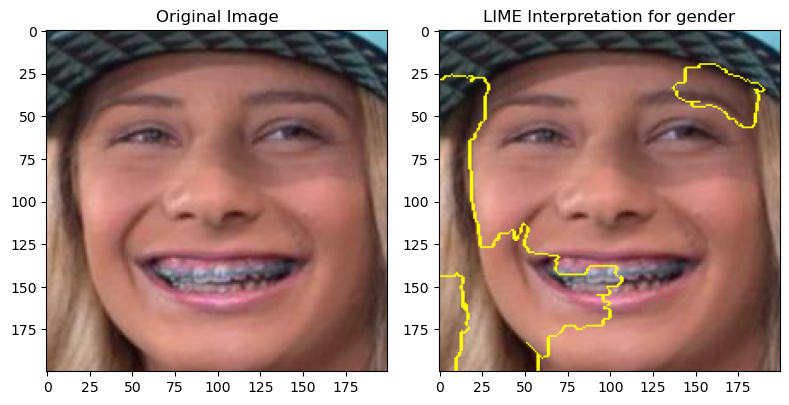

Interpreting model version v1 for age prediction (sample 3).


  0%|          | 0/1000 [00:00<?, ?it/s]

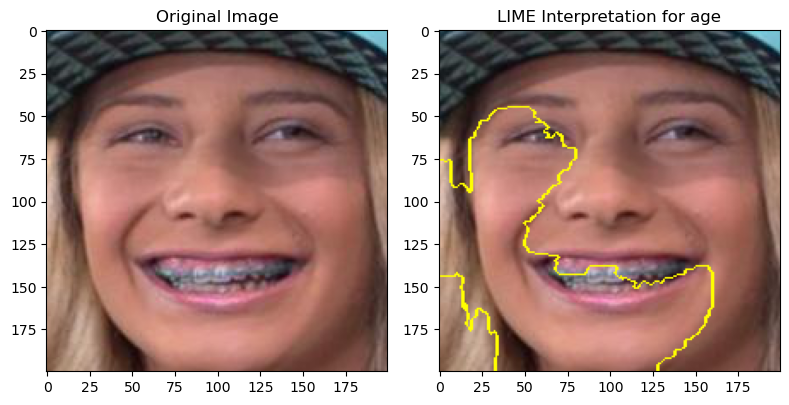

In [13]:
if os.path.exists(checkpoint_path):
    print(f"--- Interpreting Model Version: {VERSION} ---")
    model_wrapper = ModelWrapper(model)
    
    data_iter = iter(test_loader)
    for i in range(3):
        inputs, labels = next(data_iter)
        image_np = inputs[0].permute(1, 2, 0).numpy() * 255 
        label = labels

        print(f"Interpreting model version {VERSION} for gender prediction (sample {i + 1}).")
        interpret_sample(model_wrapper, image_np.astype('uint8'), label, feature_name='gender')

        print(f"Interpreting model version {VERSION} for age prediction (sample {i + 1}).")
        interpret_sample(model_wrapper, image_np.astype('uint8'), label, feature_name='age')

### LIME visualizations for three random samples

** Sample One (Older Female)**
  - Gender:
    - The LIME interpretation highlights regions of the face like the forehead, cheeks, and mouth.
    - This suggests that the model is using features in these areas to make predictions about gender.
    - Notably, the smile lines, wrinkles, and texture of the skin are emphasized, which could indicate that the model relies on age-related facial features to distinguish gender, which could be problematic if these features vary significantly across age groups.
  
  - Age:
    - Similar to the gender interpretation, the model appears to focus on facial features like wrinkles, the forehead, and the mouth for age prediction.
    - This makes sense since wrinkles and skin texture are prominent features in determining age.
    - However, the reliance on wrinkles suggests that the model may struggle with age prediction for images that have a softer focus or less visible texture.

** Sample Two (Younger Female)**
  - Gender:
    - The highlighted regions are mostly around the cheeks and edges of the face.
    - It seems like the model uses facial shape and structure to identify gender. This could mean the model relies on common gender-specific facial structures, such as rounder faces for younger females.
    - However, focusing on non-distinct features like the edge of the face might also indicate some uncertainty in the model's prediction.
    
  - Age:
    - The highlighted regions include the cheeks, forehead, and parts of the chin.
    - These are areas where skin smoothness and lack of wrinkles may contribute to the model's inference of a younger age.
    - The model appears to consider general facial smoothness, but it may be less reliable if the image has makeup or other factors that alter the visual features.

** Sample Three (Female with Braces)**
  - Gender:
    - The LIME highlights regions around the mouth, teeth (braces), and forehead.
    - This suggests that the model considers the facial expression, specifically the presence of braces and the mouth shape, to predict gender.
    - The focus on braces could indicate some unintended bias, where the model associates certain expressions or features (like braces) more with a specific gender, which could lead to incorrect assumptions.

  - Age:
    - The LIME highlights the forehead and mouth areas, particularly the braces.
    - This suggests that the model might be using non-age-specific features, like the presence of braces, which are commonly associated with a younger age group.
    - The focus on braces might indicate a learned bias, where the model assumes certain features, such as braces, are indicative of age, potentially leading to inaccurate predictions for individuals who don’t fit this stereotype.

> Insights

1. **Feature Focus:** The model appears to focus on distinct facial features like wrinkles, mouth shape, braces, and facial smoothness. While these features can be correlated with age and gender, there is a potential risk of bias if these features are over-represented in specific groups in the training data.
2. **Bias and Misinterpretation Risks:**
  - **Age and Gender Correlation:** The model seems to sometimes conflate age-related features with gender, such as using wrinkles or facial texture. This correlation can lead to inaccurate gender predictions, especially for older individuals.
  - **Over-reliance on Non-distinctive Features:** In some cases, the highlighted areas are not necessarily distinctive (e.g., facial edges or cheeks), which could indicate uncertainty in predictions or a reliance on features that do not strongly correlate with the target label.

## Best/Worst Performing Samples

--- Evaluating Model Version: v1 ---
Model loaded successfully.
Interpreting model version v1 for best performing sample 1 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

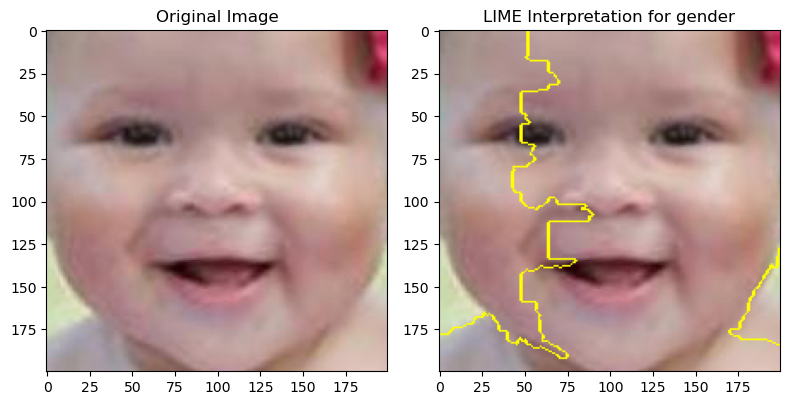

Interpreting model version v1 for best performing sample 1 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

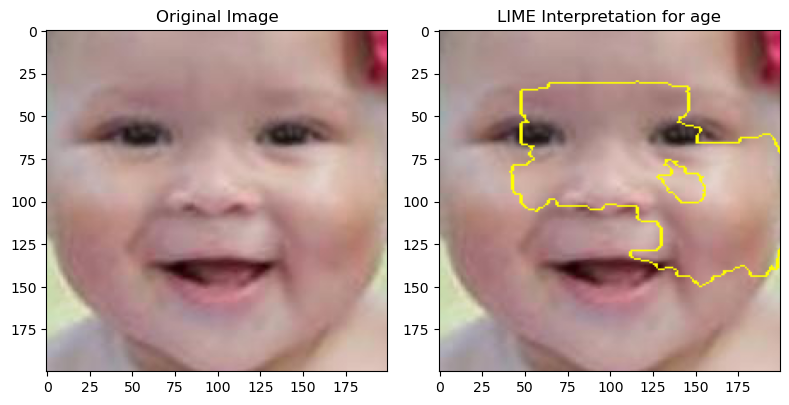

Interpreting model version v1 for best performing sample 2 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

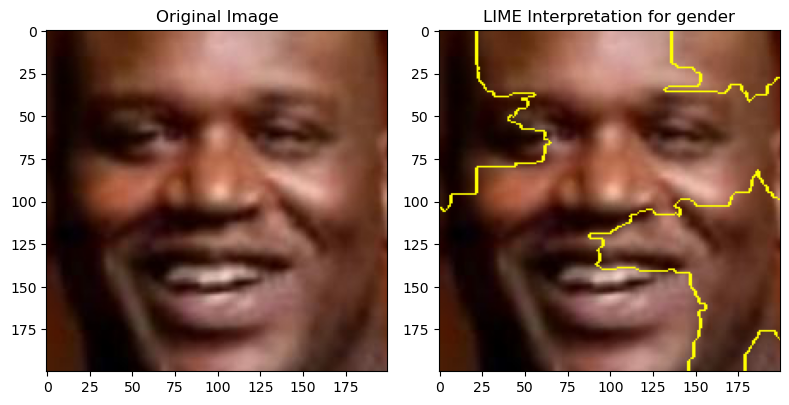

Interpreting model version v1 for best performing sample 2 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

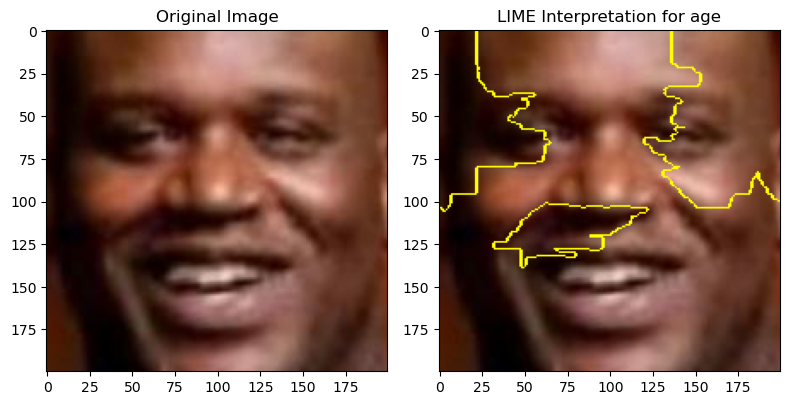

Interpreting model version v1 for best performing sample 3 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

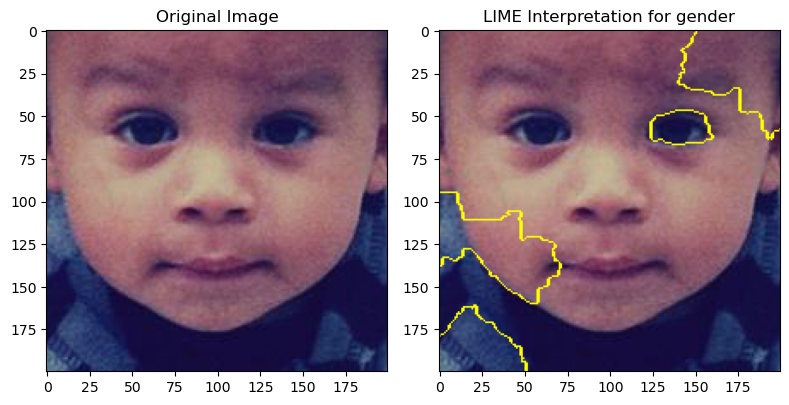

Interpreting model version v1 for best performing sample 3 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

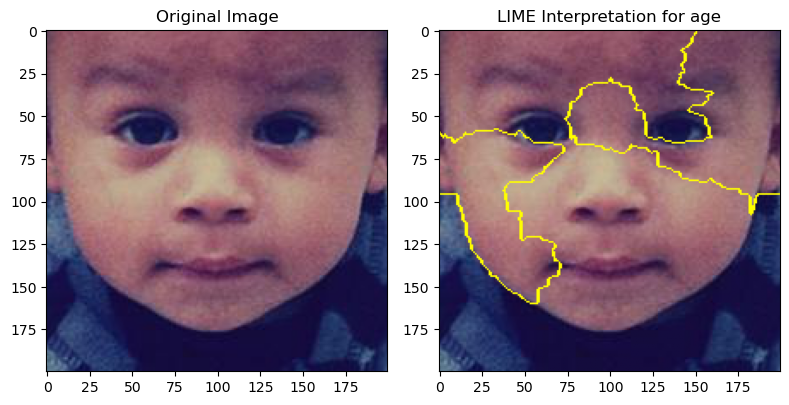

Interpreting model version v1 for worst performing sample 1 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

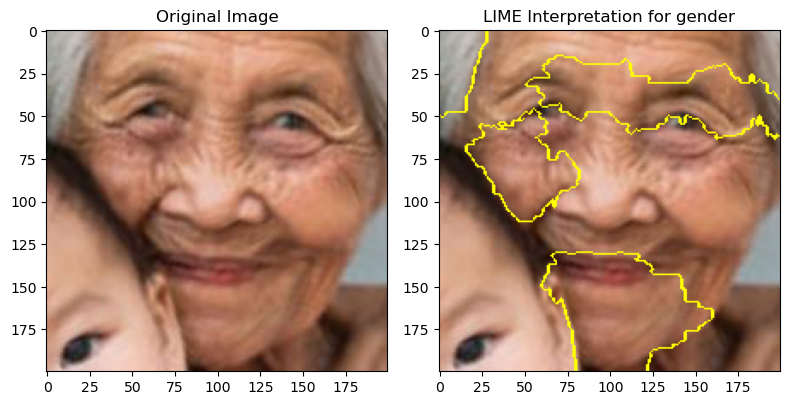

Interpreting model version v1 for worst performing sample 1 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

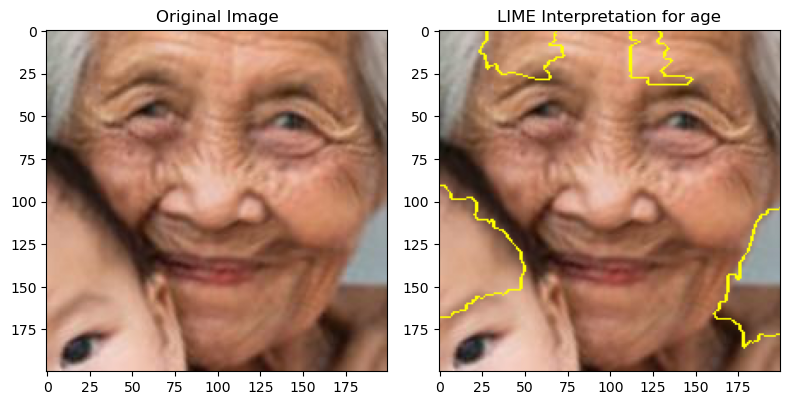

Interpreting model version v1 for worst performing sample 2 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

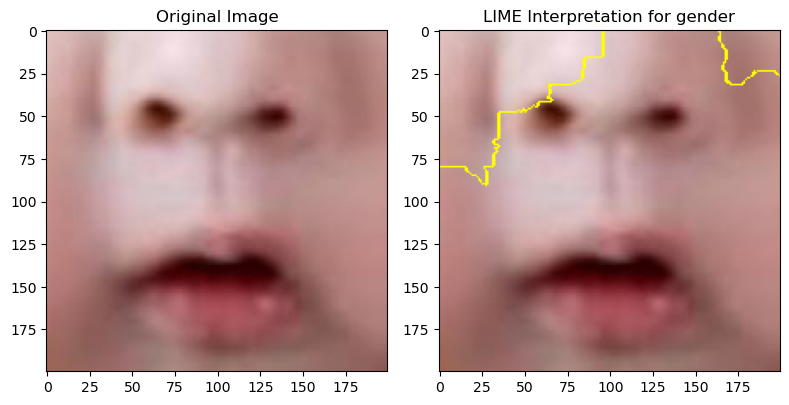

Interpreting model version v1 for worst performing sample 2 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

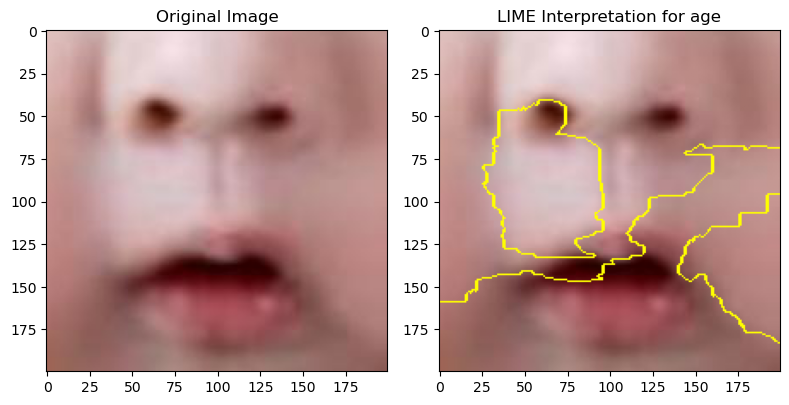

Interpreting model version v1 for worst performing sample 3 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

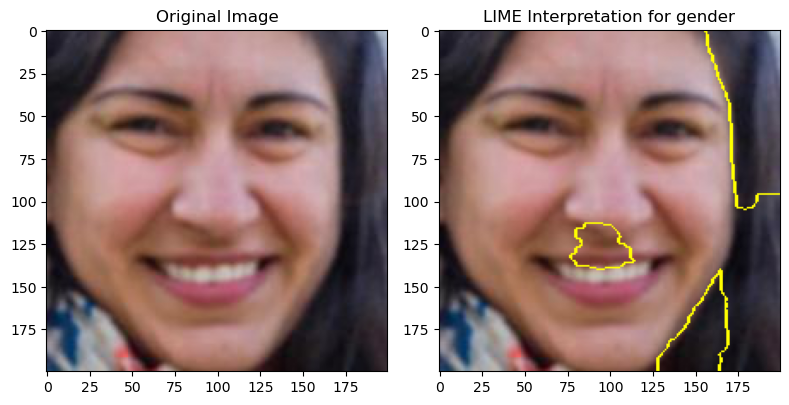

Interpreting model version v1 for worst performing sample 3 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

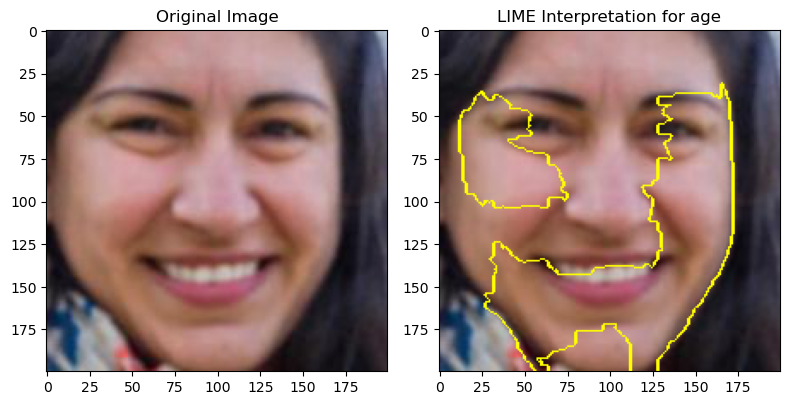

In [14]:
if os.path.exists(checkpoint_path):
    print(f"--- Evaluating Model Version: {VERSION} ---")
    
    try:
        model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=LEARNING_RATE)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model from checkpoint: {e}")

    try:
        all_predictions, all_targets = evaluate_samples(model, test_loader)

        best_samples, worst_samples = get_best_and_worst_samples(all_predictions)

        model_wrapper = ModelWrapper(model)
        for i, (image, _, _) in enumerate(best_samples):
            image_np = image.permute(1, 2, 0).cpu().numpy() * 255
            print(f"Interpreting model version {VERSION} for best performing sample {i + 1} (gender prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='gender')
            print(f"Interpreting model version {VERSION} for best performing sample {i + 1} (age prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='age')

        for i, (image, _, _) in enumerate(worst_samples):
            image_np = image.permute(1, 2, 0).cpu().numpy() * 255 
            print(f"Interpreting model version {VERSION} for worst performing sample {i + 1} (gender prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='gender')
            print(f"Interpreting model version {VERSION} for worst performing sample {i + 1} (age prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='age')

    except Exception as e:
        print(f"Error during model evaluation: {e}")

### Best Performing Samples
1. **Sample 1 (Baby)**
   - **Gender**: The LIME interpretation highlights areas on the cheeks and around the face. This indicates that the model might be relying on facial softness or symmetry to determine gender.
   - **Age**: The entire facial region is highlighted, suggesting that the model is correctly leveraging the features typically associated with babies to predict age accurately.

2. **Sample 2 (Middle-aged Male)**
   - **Gender**: The model focuses on facial features like the nose and forehead. This suggests that the model has learned distinct gender-related characteristics from these facial areas.
   - **Age**: The forehead and areas around the mouth are highlighted. Wrinkles or skin texture may be used to determine age accurately.

3. **Sample 3 (Young Child)**
   - **Gender**: The LIME visualization shows that the model is focusing on facial areas like the cheeks and around the eyes, which may be due to the softness of these regions.
   - **Age**: Similar regions are highlighted for age prediction, indicating that smooth skin and round facial features are key cues for age estimation.

### Worst Performing Samples
1. **Sample 1 (Older Individual with a Child)**
   - **Gender**: The LIME visualization shows that the model is focusing on parts of the older individual’s face as well as the child, which could be a reason for incorrect prediction. The presence of multiple people seems to confuse the model.
   - **Age**: The model also focuses on the child in the image, indicating that it struggles when multiple subjects are present, likely leading to incorrect age prediction.

2. **Sample 2 (Blurry Image of a Face)**
   - **Gender and Age Prediction**: The LIME interpretation reveals that the model is relying on very limited facial features, mostly due to the blurriness of the image and the fact that it's mostly just a nose. This suggests that the model’s poor performance is caused by insufficient visual information.

3. **Sample 3 (Middle-aged Female)**
   - **Gender**: The model seems to focus on inconsistent regions, such as the mouth and part of the cheek. This inconsistency could explain the incorrect gender prediction.
   - **Age**: Similar to gender prediction, the highlighted areas are spread across the face, indicating that the model struggles to focus on meaningful regions, resulting in poor age estimation.

### General Observations
   - The visualizations show that the model often focuses on distinct facial features such as the forehead, cheeks, mouth, and eyes. For gender prediction, the model appears to rely on structural features like the jawline and smile, while for age prediction, it focuses on skin texture and smoothness.
  
   - For the best performing samples, the model highlights regions that align with features typically associated with the predicted gender or age group (e.g., smooth skin for infants, wrinkles for older individuals).
   - The worst performing samples include images with occlusions, multiple people, or blurriness. This suggests that the model struggles when the images are not clear or when additional distractions are present.

   - The presence of multiple subjects in a single image or occluded facial features significantly impacts model performance. This suggests that the dataset and the model might benefit from better handling of such scenarios.
   - The blurriness of images was identified as a key feature affecting accuracy, as noted in the exploratory data analysis. This matches with the LIME results, where blurry images resulted in unclear model focus and poor predictions.

## Performance Per Gender

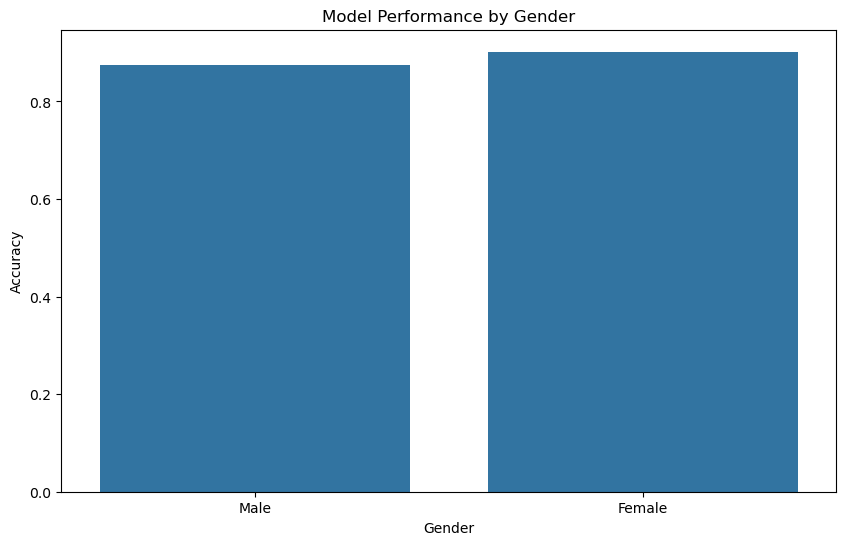

In [16]:
all_gender_targets = []
all_gender_preds = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        images, targets = batch
        gender_targets = targets['gender']
        
        images = images.to(device)
        gender_targets = gender_targets.to(device)
        
        _, gender_preds = model(images)
        gender_preds = torch.argmax(gender_preds, dim=1)

        all_gender_targets.extend(gender_targets.cpu().numpy())
        all_gender_preds.extend(gender_preds.cpu().numpy())

all_gender_targets = np.array(all_gender_targets)
all_gender_preds = np.array(all_gender_preds)

gender_labels = ['Male', 'Female']
gender_results = {label: {'Correct': 0, 'Total': 0} for label in gender_labels}

for actual, pred in zip(all_gender_targets, all_gender_preds):
    gender_results[gender_labels[actual]]['Total'] += 1
    if actual == pred:
        gender_results[gender_labels[actual]]['Correct'] += 1

gender_performance = [gender_results[gender]['Correct'] / gender_results[gender]['Total'] for gender in gender_labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_labels, y=gender_performance)
plt.xlabel('Gender')
plt.ylabel('Accuracy')
plt.title('Model Performance by Gender')
plt.show()

## Performance Per Age Group

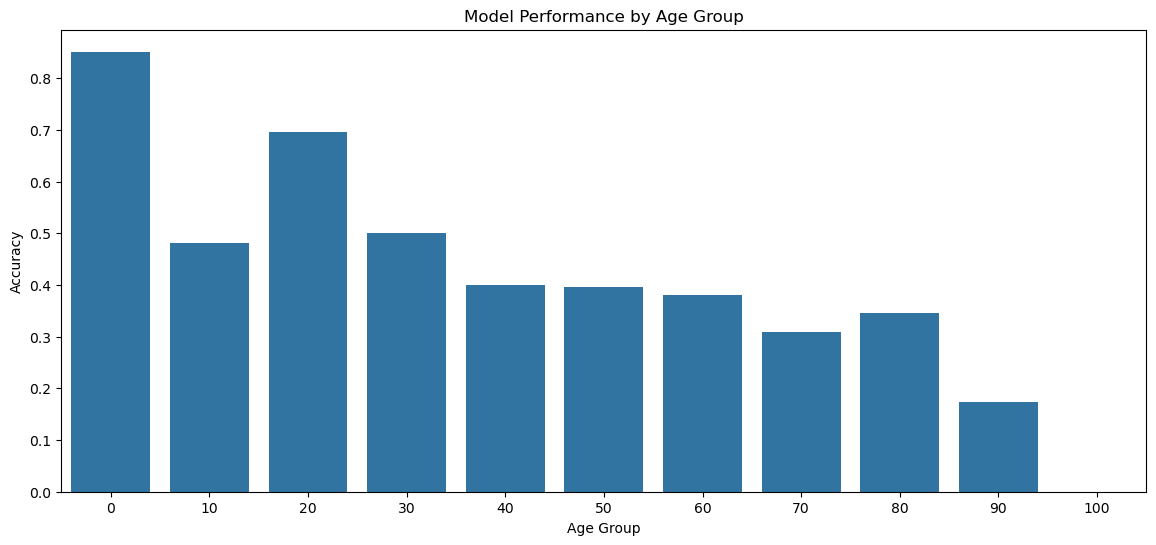

In [17]:
all_age_targets = []
all_age_preds = []

with torch.no_grad():
    for batch in test_loader:
        images, targets = batch
        age_targets = targets['age']

        images = images.to(device)
        age_targets = age_targets.to(device)

        age_preds, _ = model(images)

        all_age_targets.extend(age_targets.cpu().numpy())
        all_age_preds.extend(age_preds.cpu().numpy())

all_age_targets = np.array(all_age_targets)
all_age_preds = np.array(all_age_preds)

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_groups = pd.cut(all_age_targets, bins=age_bins)
age_accuracy = []

for age_bin in age_bins[:-1]:
    mask = (all_age_targets >= age_bin) & (all_age_targets < age_bin + 10)
    correct_predictions = np.sum((all_age_preds[mask] >= age_bin) & (all_age_preds[mask] < age_bin + 10))
    accuracy = correct_predictions / np.sum(mask) if np.sum(mask) > 0 else 0
    age_accuracy.append(accuracy)

plt.figure(figsize=(14, 6))
sns.barplot(x=age_bins[:-1], y=age_accuracy)
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.title('Model Performance by Age Group')
plt.show()

### Model Performance by Gender
- **Balanced Performance**: The plot shows that the model's performance is quite balanced for both male and female categories, with very similar accuracy scores (approximately 0.88–0.90).
- **Dataset Bias**: Given that the gender distribution in the dataset is roughly even (as observed in the EDA), the balanced accuracy might be reflective of balanced data and appropriate learning. This is a positive outcome in terms of avoiding gender bias in the predictions.

### Model Performance by Age Group
- **Better Performance for Children and Young Adults**:
  - The model performs the best on the youngest age group (0–10), with accuracy above 80%. This may be because younger facial features are more distinct, such as baby-like features that are easy to identify.
  - Performance decreases for age groups beyond 10 years, with particularly lower accuracy for ages 30+ and especially 90+ (where accuracy drops below 30%). The decline in performance may be due to the similarity of facial features among older age groups or the lower representation of these age groups in the dataset.
  
- **Challenges in Older Age Groups**:
  - The model struggles more with the older age categories, which might be due to the more diverse physical characteristics of older individuals (e.g., variations in skin texture, facial structure).
  - This could also be influenced by fewer samples of elderly individuals in the training data, leading to underrepresentation and difficulties generalizing.

### Model Limitations
1. **Blurriness and Image Quality**: 
   - As highlighted in the EDA, blurriness is an important factor affecting model performance. The worst-performing samples indicate that the model has a harder time accurately predicting gender and age when the image quality is low, which directly ties into the distribution of blurriness in the dataset.
   - Ensuring better image quality or incorporating blurriness augmentation during training could help improve robustness.

2. **Age and Saturation Imbalance**:
   - The model’s accuracy decreases notably in age groups with fewer samples or where there is a lot of variation (e.g., individuals over 60 years). This is consistent with the observed age imbalance and suggests that additional training samples for these groups could help.
   - Variations in saturation, particularly in "Others" race categories, could also affect feature extraction. As seen in the EDA, some images have very low saturation, possibly making it harder for the model to learn effective features.